In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv("C:\\Users\\srnva\\Desktop\\NIT Warangal\\Assignments\\Assignment Datasets\\Assignment --5\\Titanic_train.csv")

In [3]:
train.head(5)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,463,0,1,"Gee, Mr. Arthur H",male,47.0,0,0,111320,38.5000,E63,S
1,1,121,0,2,"Hickman, Mr. Stanley George",male,21.0,2,0,S.O.C. 14879,73.5000,NaN,S
2,3,415,1,3,"Sundman, Mr. Johan Julian",male,44.0,0,0,STON/O 2. 3101269,7.9250,NaN,S
3,4,480,1,3,"Hirvonen, Miss. Hildur E",female,2.0,0,1,3101298,12.2875,NaN,S
4,5,622,1,1,"Kimball, Mr. Edwin Nelson Jr",male,42.0,1,0,11753,52.5542,D19,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 13 columns):
Unnamed: 0     781 non-null int64
PassengerId    781 non-null int64
Survived       781 non-null int64
Pclass         781 non-null int64
Name           781 non-null object
Sex            781 non-null object
Age            628 non-null float64
SibSp          781 non-null int64
Parch          781 non-null int64
Ticket         781 non-null object
Fare           781 non-null float64
Cabin          175 non-null object
Embarked       779 non-null object
dtypes: float64(2), int64(6), object(5)
memory usage: 79.4+ KB


In [5]:
train.isnull().sum()

Unnamed: 0       0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            153
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          606
Embarked         2
dtype: int64

In [6]:
train.isnull().count()

Unnamed: 0     781
PassengerId    781
Survived       781
Pclass         781
Name           781
Sex            781
Age            781
SibSp          781
Parch          781
Ticket         781
Fare           781
Cabin          781
Embarked       781
dtype: int64

In [7]:
data_missing_percentage = round((train.isnull().sum())/(train.isnull().count())*100,2)
data_missing_percentage

Unnamed: 0      0.00
PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.59
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.59
Embarked        0.26
dtype: float64

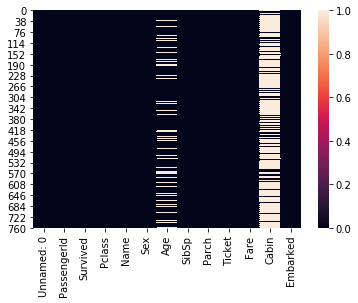

In [8]:
sns.heatmap(data = train.isnull())

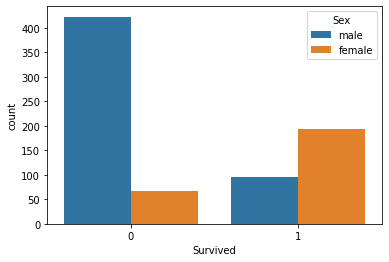

In [9]:
sns.countplot(x='Survived', hue = 'Sex', data=train)

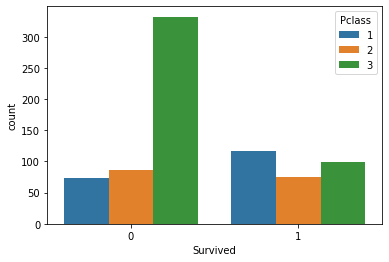

In [10]:
sns.countplot(x='Survived', hue = 'Pclass', data=train)

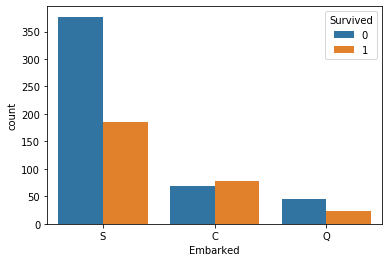

In [11]:
sns.countplot(x = 'Embarked', data = train, hue = 'Survived')

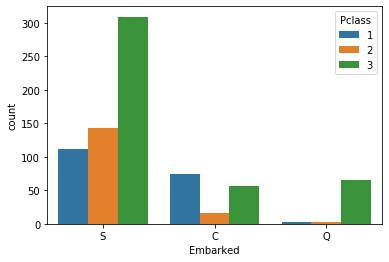

In [12]:
sns.countplot(x = 'Embarked', data = train, hue = 'Pclass')

In [13]:
train[['Pclass','Age']].groupby('Pclass').mean()

,Age
Pclass,
1,38.015125
2,29.691699
3,25.287841


In [14]:
def impute_age(age_pclass):
    age = age_pclass[0]
    pclass = age_pclass[1]
    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 30
        else:
            return 25
    else:
        return age

In [15]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis=1)

In [16]:
sex = pd.get_dummies(train['Sex'], drop_first = True)
sex.head(5)

,male
0,1
1,1
2,1
3,0
4,1


In [17]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)
embark.head(5)

,Q,S
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [18]:
train = pd.concat([train, sex, embark], axis=1)

In [19]:
train.head(5)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S
0,0,463,0,1,"Gee, Mr. Arthur H",male,47.0,0,0,111320,38.5000,E63,S,1,0,1
1,1,121,0,2,"Hickman, Mr. Stanley George",male,21.0,2,0,S.O.C. 14879,73.5000,NaN,S,1,0,1
2,3,415,1,3,"Sundman, Mr. Johan Julian",male,44.0,0,0,STON/O 2. 3101269,7.9250,NaN,S,1,0,1
3,4,480,1,3,"Hirvonen, Miss. Hildur E",female,2.0,0,1,3101298,12.2875,NaN,S,0,0,1
4,5,622,1,1,"Kimball, Mr. Edwin Nelson Jr",male,42.0,1,0,11753,52.5542,D19,S,1,0,1


In [20]:
train.drop(['Sex','Ticket','Embarked', 'Name'], axis = 1, inplace = True)
train.head(5)

,Unnamed: 0,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
0,0,463,0,1,47.0,0,0,38.5000,E63,1,0,1
1,1,121,0,2,21.0,2,0,73.5000,NaN,1,0,1
2,3,415,1,3,44.0,0,0,7.9250,NaN,1,0,1
3,4,480,1,3,2.0,0,1,12.2875,NaN,0,0,1
4,5,622,1,1,42.0,1,0,52.5542,D19,1,0,1


In [21]:
train.drop('PassengerId', axis=1, inplace=True)

In [22]:
train.head(5)

,Unnamed: 0,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
0,0,0,1,47.0,0,0,38.5000,E63,1,0,1
1,1,0,2,21.0,2,0,73.5000,NaN,1,0,1
2,3,1,3,44.0,0,0,7.9250,NaN,1,0,1
3,4,1,3,2.0,0,1,12.2875,NaN,0,0,1
4,5,1,1,42.0,1,0,52.5542,D19,1,0,1


In [23]:
train.drop('Unnamed: 0',axis=1, inplace=True)

In [24]:
train.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
0,0,1,47.0,0,0,38.5000,E63,1,0,1
1,0,2,21.0,2,0,73.5000,NaN,1,0,1
2,1,3,44.0,0,0,7.9250,NaN,1,0,1
3,1,3,2.0,0,1,12.2875,NaN,0,0,1
4,1,1,42.0,1,0,52.5542,D19,1,0,1


In [25]:
X = train.drop(['Survived','Cabin'], axis = 1)
y = train['Survived']

In [26]:
X.head(5)

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,47.0,0,0,38.5000,1,0,1
1,2,21.0,2,0,73.5000,1,0,1
2,3,44.0,0,0,7.9250,1,0,1
3,3,2.0,0,1,12.2875,0,0,1
4,1,42.0,1,0,52.5542,1,0,1


In [27]:
y.head(5)

0    0
1    0
2    1
3    1
4    1
Name: Survived, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\srnva\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
predicted = lr.predict(X_test)

In [33]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       152
           1       0.86      0.68      0.76       106

    accuracy                           0.82       258
   macro avg       0.83      0.80      0.81       258
weighted avg       0.83      0.82      0.82       258



In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
print(confusion_matrix(y_test, predicted))

[[140  12]
 [ 34  72]]
